In [76]:
import pdfplumber
import glob
import os


In [77]:
source_pdf_dir = "../data/raw/MSFT/10-K/PDFs/"

# Get list of all PDF files in source directory
pdf_files = glob.glob(os.path.join(source_pdf_dir, "*.pdf"))

# Print number of files found
print(f"Found {len(pdf_files)} PDF files in {source_pdf_dir}")

Found 3 PDF files in ../data/raw/MSFT/10-K/PDFs/


In [78]:
test_pdf = pdf_files[0]
test_page = pdfplumber.open(test_pdf).pages[45]
im = test_page.to_image()

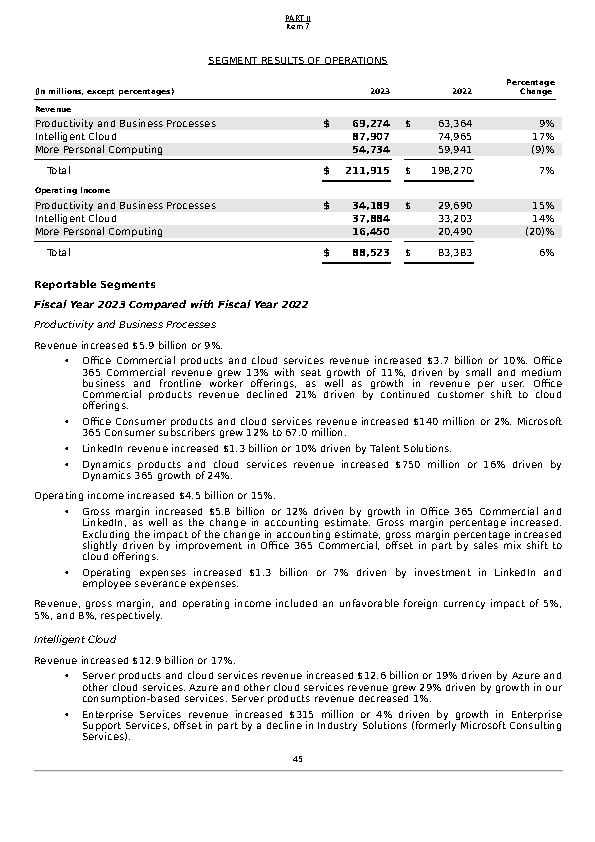

In [79]:
im

In [80]:

table_settings = {
    "vertical_strategy": "lines",
    "horizontal_strategy": "lines",
    "snap_x_tolerance": 10,
    "snap_y_tolerance": 10,
    "join_tolerance": 3,
    "edge_min_length": 3,
    "min_words_vertical": 3,
    "min_words_horizontal": 1,
    "intersection_tolerance": 3,
    "text_tolerance": 3,
    "text_x_tolerance": 3,
    "text_y_tolerance": 3
}

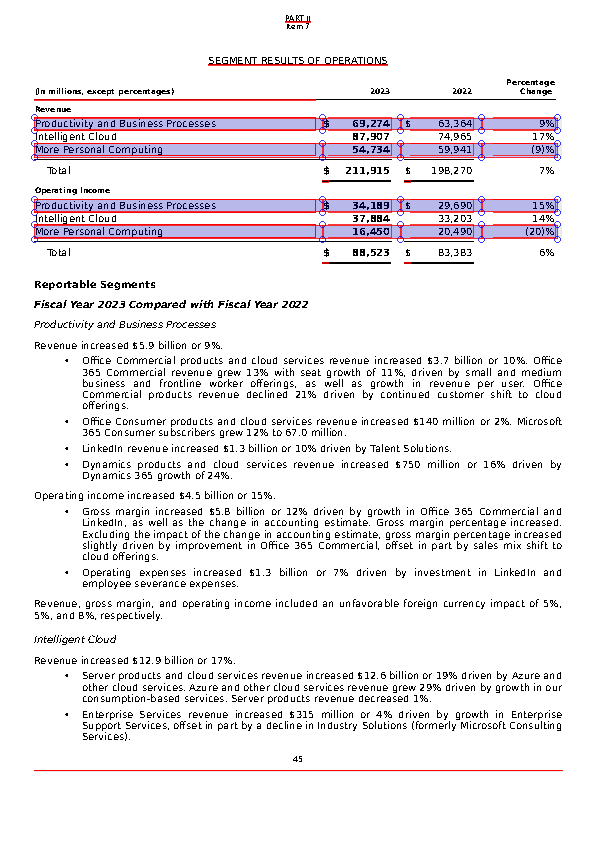

In [81]:
im.debug_tablefinder(table_settings=table_settings)

In [84]:
tables = test_page.extract_tables(table_settings)

In [86]:
tables

for table in range(len(tables)):
    tables[table]=tables[table][0]

In [87]:
import pandas as pd

df = pd.DataFrame(tables)  # use first row as header

In [88]:
df

,0,1,2,3
0,Productivity and Business Processes,"$ 69,274","$ 63,364",9%
1,More Personal Computing,"54,734","59,941",(9)%
2,Productivity and Business Processes,"$ 34,189","$ 29,690",15%
3,More Personal Computing,"16,450","20,490",(20)%
